<strong>데이터 시각화</strong>를 위한 <strong>라이브러리 import</strong> 후<br><strong>한글 깨짐 처리</strong>

In [ ]:
# 데이터 시각화를 위한 라이브러리 import
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 한글 깨짐 방지
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

# save_image()를 위한 plotly 설치
!pip install plotly==4.4.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [ ]:
df_jeonju = pd.read_csv('/content/extremum_20210627232827.csv', encoding='cp949')

In [ ]:
df_jeonju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   일시         102 non-null    int64  
 1   평균기온(℃)    102 non-null    float64
 2   평균최고기온(℃)  102 non-null    float64
 3   최고기온(℃)    102 non-null    float64
 4   	최고기온일자    102 non-null    object 
 5   평균최저기온(℃)  102 non-null    float64
 6   최저기온(℃)    102 non-null    float64
 7   최저기온일자     102 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 6.5+ KB


In [ ]:
df_jeonju.head(3)

,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),\t최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
0,1919,24.3,29.6,35.3,1919-08-13,20.3,15.0,1919-06-14
1,1920,24.1,29.5,34.1,1920-06-30,19.9,11.7,1920-06-01
2,1921,23.4,28.3,34.9,1921-08-14,19.6,9.3,1921-06-06


In [ ]:
df_jeonju.tail(3)

,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),\t최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
99,2018,26.5,31.8,38.9,2018-08-13,22.4,15.2,2018-06-01
100,2019,24.8,29.5,35.1,2019-08-14,21.1,12.7,2019-06-01
101,2020,24.9,29.3,35.1,2020-06-09,21.6,13.5,2020-06-02


In [ ]:
# 날짜와 기온을 담을 리스트 준비하기
# 1. 1930년 ~ 1942년 리스트
year30_42 = [year for year in range(1930, 1943)]
jj_30_42 = []
jj_30_42_temp = []

# 2. 1943년 ~ 1955년 리스트
year43_55 = [year for year in range(1943, 1956)]
jj_43_55 = []
jj_43_55_temp = []

# 3. 1956년 ~ 1968년 리스트
year56_68 = [year for year in range(1956, 1969)]
jj_56_68 = []
jj_56_68_temp = []

# 4. 1969년 ~ 1981년 리스트
year69_81 = [year for year in range(1969, 1982)]
jj_69_81 = []
jj_69_81_temp = []

# 5. 1982년 ~ 1994년 리스트
year82_94 = [year for year in range(1982, 1995)]
jj_82_94 = []
jj_82_94_temp = []

# 6. 1995년 ~ 2007년 리스트
year95_07 = [year for year in range(1995, 2008)]
jj_95_07 = []
jj_95_07_temp = []

# 7. 2008년 ~ 2020년 리스트
year08_20 = [year for year in range(2008, 2021)]
jj_08_20 = []
jj_08_20_temp = []

In [ ]:
# 전주시 기온 데이터 시각화를 위한 데이터 리스트에 담기
for i in df_jeonju.index :
  for j in range(13) :
    if year30_42[j] == df_jeonju.loc[i, '일시'] :
      jj_30_42.append(df_jeonju.loc[i, '일시'])
      jj_30_42_temp.append(df_jeonju.loc[i, '평균최고기온(℃)'])

    elif year43_55[j] == df_jeonju.loc[i, '일시'] :
      jj_43_55.append(df_jeonju.loc[i, '일시'])
      jj_43_55_temp.append(df_jeonju.loc[i, '평균최고기온(℃)'])

    elif year56_68[j] == df_jeonju.loc[i, '일시'] :
      jj_56_68.append(df_jeonju.loc[i, '일시'])
      jj_56_68_temp.append(df_jeonju.loc[i, '평균최고기온(℃)'])

    elif year69_81[j] == df_jeonju.loc[i, '일시'] :
      jj_69_81.append(df_jeonju.loc[i, '일시'])
      jj_69_81_temp.append(df_jeonju.loc[i, '평균최고기온(℃)'])

    elif year82_94[j] == df_jeonju.loc[i, '일시'] :
      jj_82_94.append(df_jeonju.loc[i, '일시'])
      jj_82_94_temp.append(df_jeonju.loc[i, '평균최고기온(℃)'])
      
    elif year95_07[j] == df_jeonju.loc[i, '일시'] :
      jj_95_07.append(df_jeonju.loc[i, '일시'])
      jj_95_07_temp.append(df_jeonju.loc[i, '평균최고기온(℃)'])

    elif year08_20[j] == df_jeonju.loc[i, '일시'] :
      jj_08_20.append(df_jeonju.loc[i, '일시'])
      jj_08_20_temp.append(df_jeonju.loc[i, '평균최고기온(℃)'])

In [ ]:
print('jj_08_20_temp의 평균기온 :', sum(jj_08_20_temp)/len(jj_08_20_temp))
print('jj_95_07_temp 평균기온 :', sum(jj_95_07_temp)/len(jj_95_07_temp))

jj_08_20_temp의 평균기온 : 30.307692307692314
jj_95_07_temp 평균기온 : 29.76923076923077


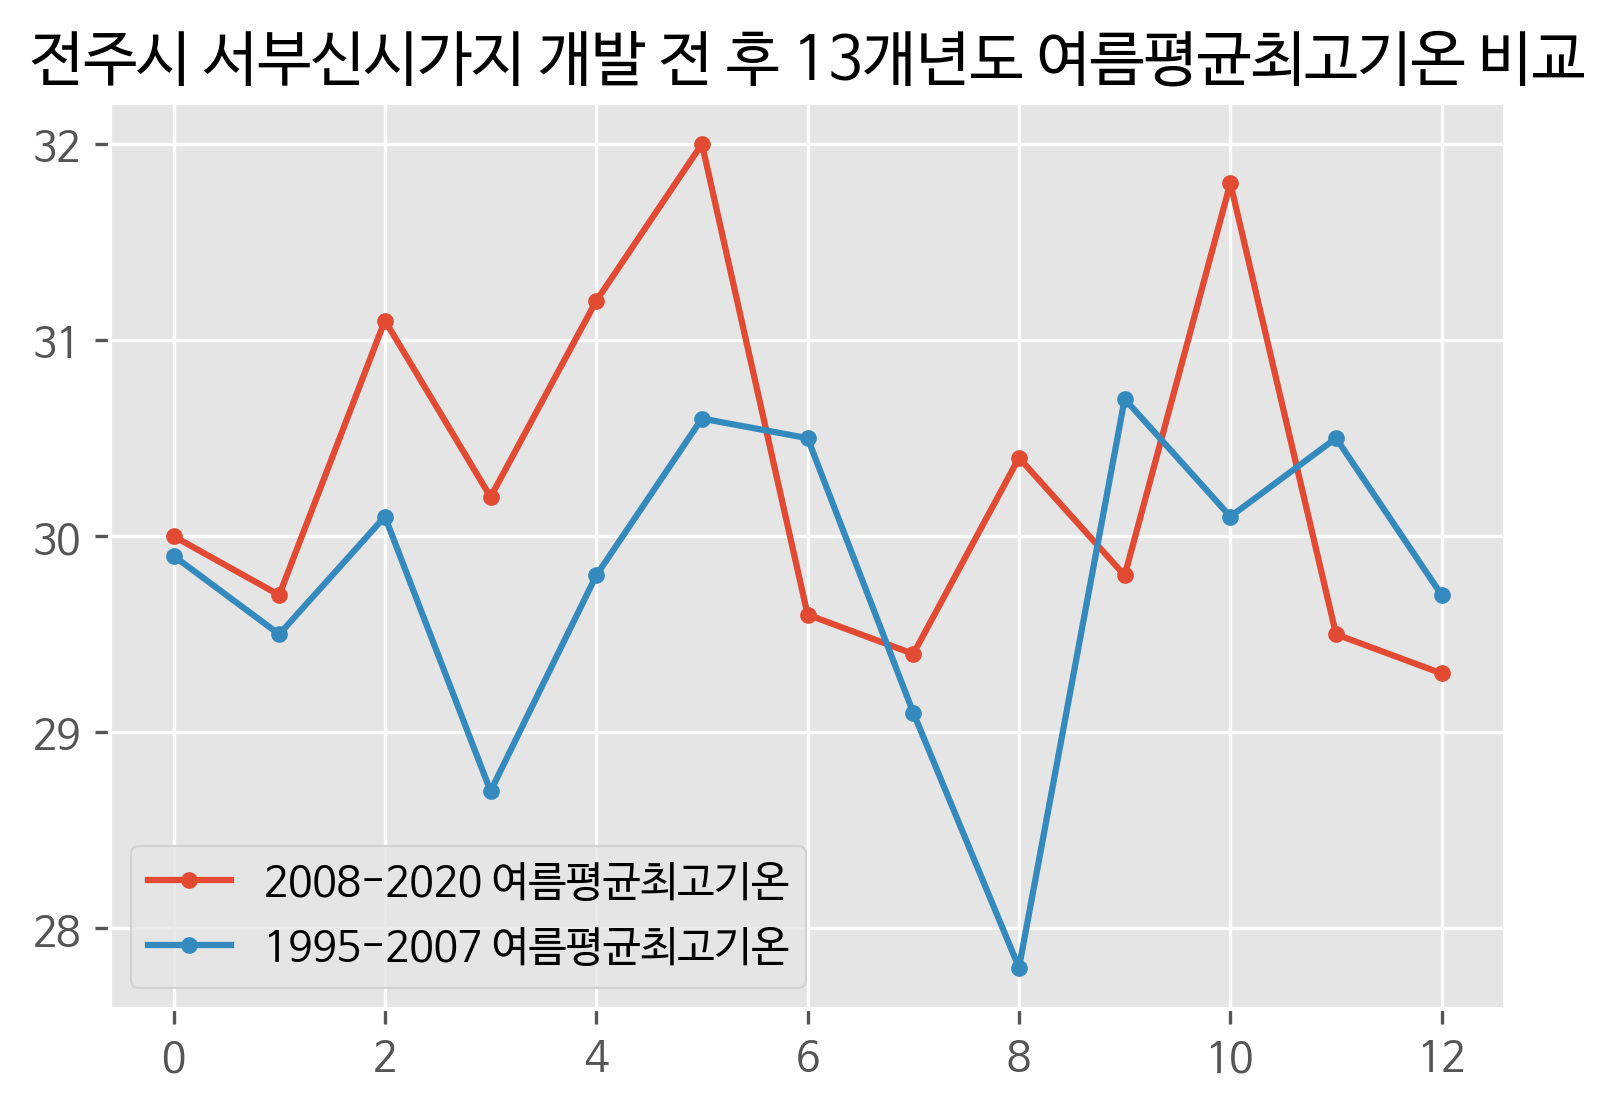

In [ ]:
# 데이터 시각화
# 차트 설정
plt.figure(dpi=150)
plt.style.use('ggplot') # 스타일 지정
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 차트 그리기
# plt.plot(jj_30_42_temp, marker='.', label='1930-1942 연평균기온')
# plt.plot(jj_43_55_temp, marker='.', label='1943-1955 연평균기온')
# plt.plot(jj_56_68_temp, marker='.', label='1956-1968 연평균기온')
# plt.plot(jj_69_81_temp, marker='.', label='1969-1981 연평균기온')
# plt.plot(jj_82_94_temp, marker='.', label='1982-1994 연평균기온')
plt.plot(jj_08_20_temp, marker='.', label='2008-2020 여름평균최고기온')
plt.plot(jj_95_07_temp, marker='.', label='1995-2007 여름평균최고기온')
plt.title('전주시 서부신시가지 개발 전 후 13개년도 여름평균최고기온 비교')
plt.legend() # 범례 표시
plt.show()

In [ ]:
# # 2002년 데이터만 가져오기
# # 2002년 데이터만 담을 리스트 준비
# year2002 = []
# temp2002 = []
# for i in df.index :
#   if '2002' in df.loc[i,'날짜'] :
#     year2002.append(df.loc[i, '날짜'])
#     temp2002.append(df.loc[i, '평균기온(℃)'])

In [ ]:
# print(len(year2002))
# print(year2002)
# print(len(temp2002))
# print(temp2002)

In [ ]:
# # 2008년 데이터만 가져오기
# # 2008년 데이터만 담을 리스트 준비
# year2008 = []
# temp2008 = []
# for i in df.index :
#   if '2020' in df.loc[i,'날짜'] :
#     year2008.append(df.loc[i, '날짜'])
#     temp2008.append(df.loc[i, '평균기온(℃)'])

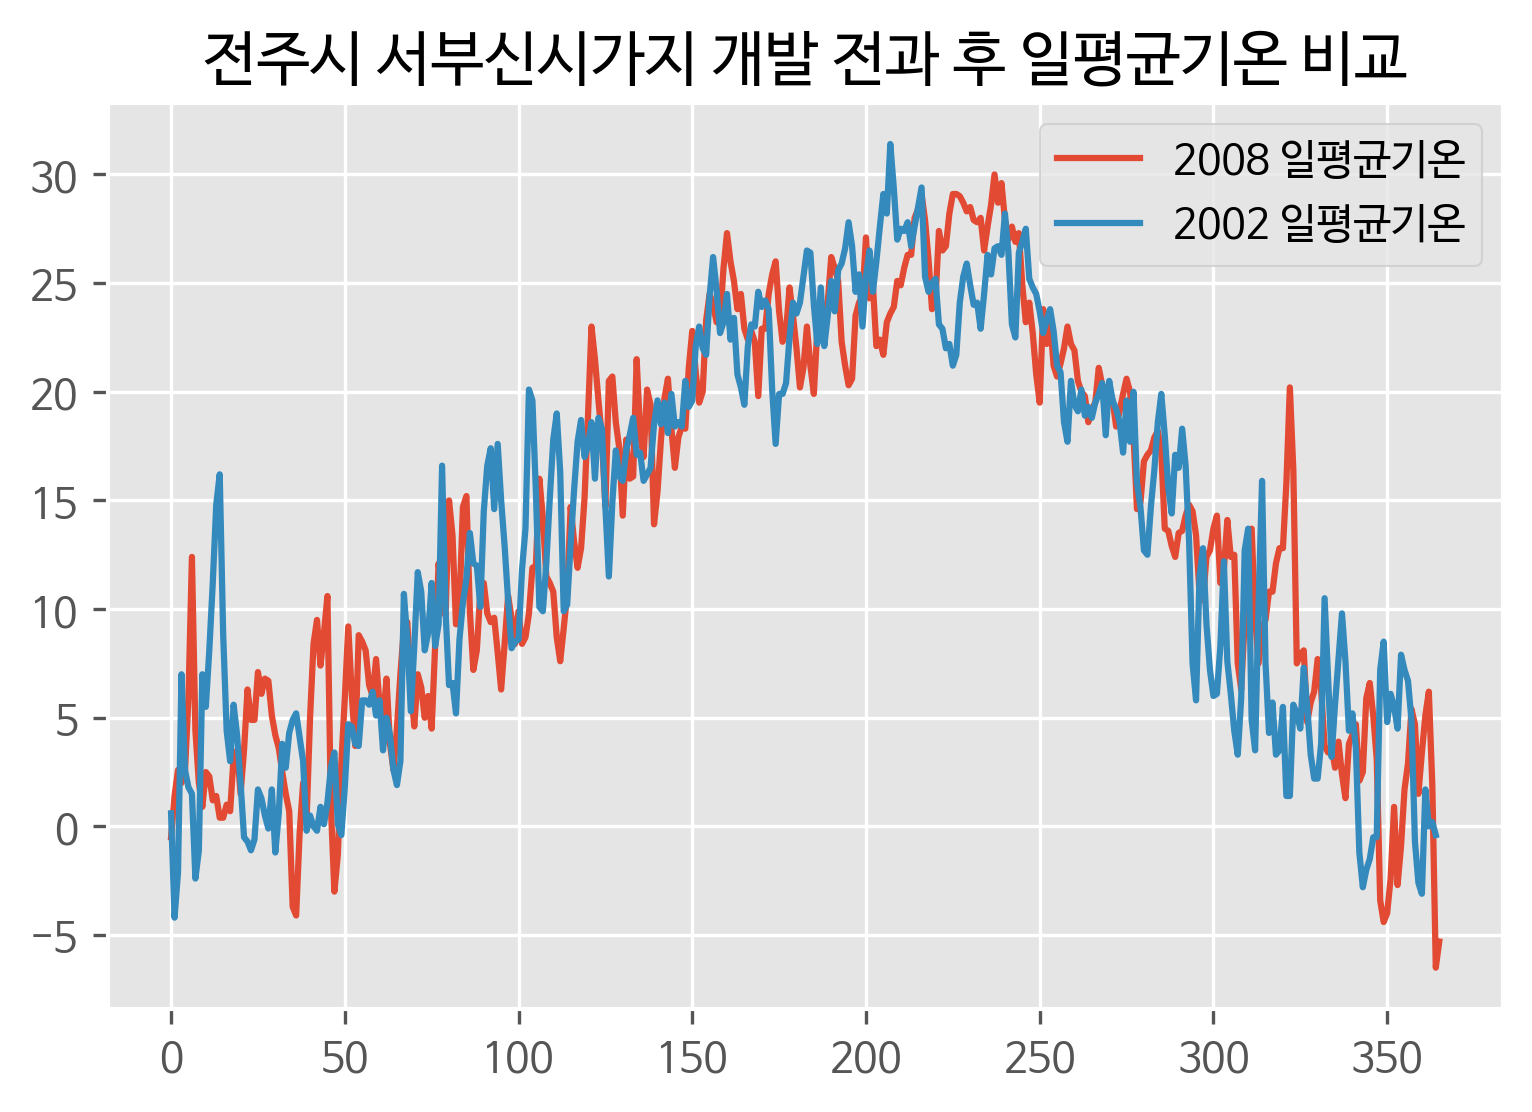

In [ ]:
# # 데이터 시각화
# # 차트 설정
# plt.figure(dpi=150)
# plt.style.use('ggplot') # 스타일 지정
# plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
# plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# # 차트 그리기
# plt.plot(temp2008, label='2008 일평균기온')
# plt.plot(temp2002, label='2002 일평균기온')
# plt.title('전주시 서부신시가지 개발 전과 후 일평균기온 비교')
# plt.legend() # 범례 표시
# plt.show()